In [2]:
import numpy as np
import matplotlib
# interaktywne wykresy:
%matplotlib notebook
from matplotlib import pyplot as plt

from lab2 import draw_vector

Macierz o wymiarach $n$ wierszy na $m$ kolumn reprezentuje odwzorowanie liniowe z $\mathbb{R}^m$ w $\mathbb{R}^n$.

Mnożenie macierzy przez wektor to przepuszczenie tego wektora przez odwzorowanie liniowe. Stąd wektor musi mieć długość $m$, a wynik ma długość $n$.

In [7]:
rng = np.random.RandomState(seed=43)    

M = rng.normal(size=(2,3))
w = rng.uniform(size=3)
v = rng.uniform(size=3)

print("M:")
print(M)
print("M.shape:", M.shape)
print("w:", w)
print("v:", v)
print("w + v:", w+v)
print("M.w:", np.dot(M,w))
print("M.v:", np.dot(M,v))
print("M.(w + v):", np.dot(M,w+v))

M:
[[ 0.25739993 -0.90848143 -0.37850311]
 [-0.5349156   0.85807335 -0.41300998]]
M.shape: (2, 3)
w: [ 0.66609021  0.54116221  0.02901382]
v: [ 0.7337483   0.39495002  0.80204712]
w + v: [ 1.39983851  0.93611223  0.83106094]
M.w: [-0.33116607  0.09607183]
M.v: [-0.47351533 -0.38485079]
M.(w + v): [-0.8046814  -0.28877897]


<IPython.core.display.Javascript object>


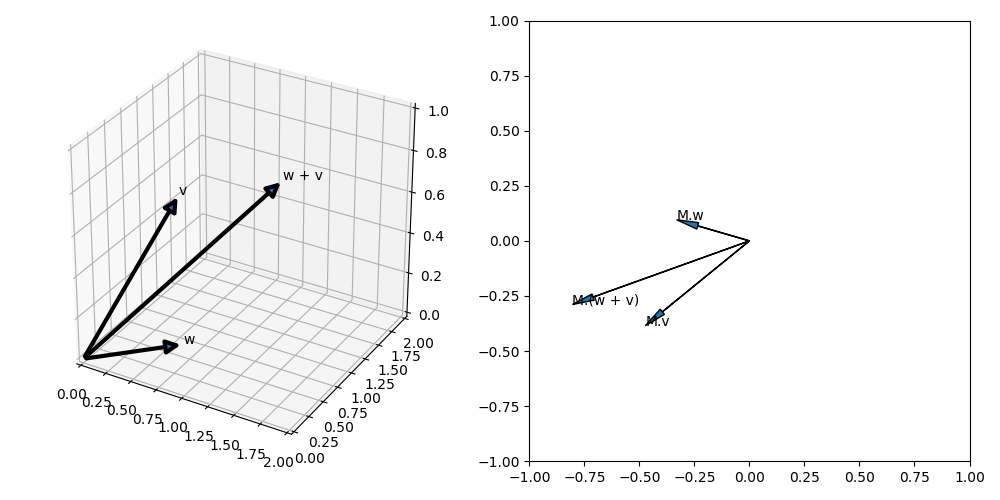

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_ylim(0,2)
draw_vector(w, ax, "w")
draw_vector(v, ax, "v")
draw_vector(w + v, ax, "w + v")

ax = fig.add_subplot(122)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
draw_vector(np.dot(M, w), ax, "M.w")
draw_vector(np.dot(M, v), ax, "M.v")
draw_vector(np.dot(M, w + v), ax, "M.(w + v)")
fig.tight_layout()

Mnożenie macierzy to składanie takich odwzorowań.

Mnożenie macierzowe przekształca przestrzeń liniowo. Oznacza to, że sfery przechodzą na (obrócone i rozciągnięte, ew. odbite symetrycznie) elipsoidy. Wymiar przestrzeni wynikowej jest równy rzędowi macierzy.

Oznacza to, że jeśli np. macierz jest wymiaru $3\times 3$, czyli prowadzi z z $\mathbb{R}^3$ w $\mathbb{R}^3$, ale rząd tej macierzy wynosi dwa, to obraz odwzorowania liniowego jest dwuwymiarową podprzestrzenią 

In [12]:
seed = 555
rng = np.random.RandomState(seed)

"""
# WERSJA 1 - SAMPLE Z GAUSSA
n = 1500
points = rng.normal(size=(n,3))
colors = ((points / np.linalg.norm(points, axis=1).reshape(-1,1) + [1,1,1]) / 2.)
"""

#"""
# WERSJA 2 - KONCENTRYCZNE SFERY
n = 500
points = rng.normal(size=(n,3))
points /= np.linalg.norm(points, axis=1).reshape(-1,1)
colors = ((points + [1,1,1]) / 2.)
points = np.vstack((points, 3*points, 5*points))
colors = np.vstack((colors, colors, colors))
#"""

# żeby notebook nie wypisał wykomentowanego kodu jako stringa
print("", end='')

<IPython.core.display.Javascript object>


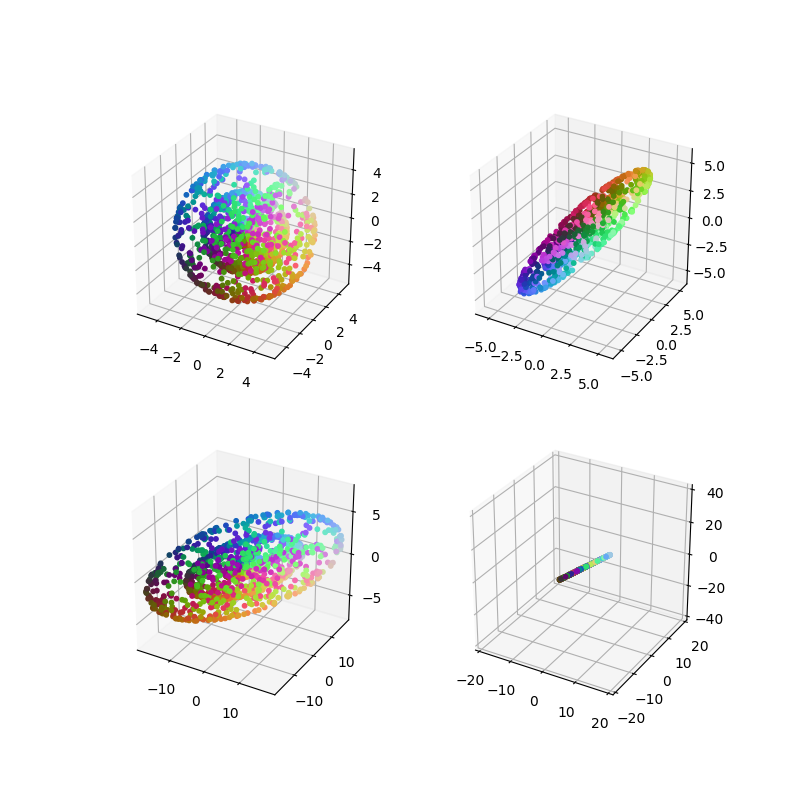

In [14]:
s = 10

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.axis("equal")
ax.scatter(*points.T, c=colors, s=s, alpha=1)

# rząd macierzy == 3, losowa macierz tak ma
M1 = rng.normal(size=(3,3))
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.axis("equal")
ax.scatter(*np.dot(M1, points.T), c=colors, s=s, alpha=1)

# rząd macierzy == 2
M2 = np.array([
    [1, 2, 3],
    [2, 2, 2],
    [-1, 0, 1]
])
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.axis("equal")
ax.scatter(*np.dot(M2, points.T), c=colors, s=s, alpha=1)

# rząd macierzy == 1
M3 = np.array([
    [1, 2, 3],
    [-1, -2, -3],
    [2, 4, 6]
])
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.axis("equal")
ax.scatter(*np.dot(M3, points.T), c=colors, s=s, alpha=1)

### Zadanie (niepunktowane)

Pokazać, że $(M_1 \cdot M_2) (v) = M_1(M_2(v))$ dla:
* $M_1 = \begin{bmatrix}
    0 & 1 & 2 \\
    3 & 2 & -1 \end{bmatrix}$
* $M_2 = \begin{bmatrix}
    1 & 2 \\
    3 & 2 \\
    -1 & 0 \end{bmatrix}$
* $v = \begin{bmatrix}
    2 \\
    3 \end{bmatrix}$

Jakie są wymiary macierzy i wektorów występujących w tym równaniu? Skąd i w co idą odwzorowania liniowe?